CNN MODEL

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [3]:
# Data Preprocessing
(train_ds, test_ds), ds_info = tfds.load('stanford_dogs', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

# Model Building - CNN Model
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split the dataset
train_size = int(0.8 * ds_info.splits['train'].num_examples)
val_ds = train_ds.skip(train_size)
train_ds = train_ds.take(train_size)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/12000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteEGUVFQ/stanford_dogs-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/8580 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/0.2.0.incompleteEGUVFQ/stanford_dogs-test.tfrecord*...:   0%…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


In [4]:
# Load Stanford Dogs dataset
(train_ds, test_ds), ds_info = tfds.load('stanford_dogs', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

# Preprocess function to resize images
def preprocess_image(image, label):
    # Resize the image to a consistent shape
    image = tf.image.resize(image, (224, 224))
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    return image, label

# Apply preprocessing to the dataset
train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

# Print the number of elements in the training dataset
num_train_elements = tf.data.experimental.cardinality(train_ds)
print("Number of elements in the training dataset:", num_train_elements)

# Extract and print the first batch of images and labels
for images, labels in train_ds.batch(32).take(1):
    print("Shape of images:", images.shape)
    print("Shape of labels:", labels.shape)

# Implement callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

# Model Training and Optimization - CNN Model
cnn_history = cnn_model.fit(
    train_ds.batch(32),
    epochs=20,
    validation_data=test_ds.batch(32),  # Use test dataset for validation for now
    callbacks=[early_stopping, model_checkpoint]  # Add EarlyStopping and ModelCheckpoint callbacks
)

Number of elements in the training dataset: tf.Tensor(9600, shape=(), dtype=int64)
Shape of images: (32, 224, 224, 3)
Shape of labels: (32,)
Epoch 1/20
300/300 [==============================] - ETA: 0s - loss: 4.8030 - accuracy: 0.0078

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


300/300 [==============================] - 56s 138ms/step - loss: 4.8030 - accuracy: 0.0078 - val_loss: 4.7888 - val_accuracy: 0.0063
Epoch 2/20
300/300 [==============================] - 24s 81ms/step - loss: 4.7774 - accuracy: 0.0099 - val_loss: 4.7372 - val_accuracy: 0.0125
Epoch 3/20
300/300 [==============================] - 22s 73ms/step - loss: 4.6849 - accuracy: 0.0183 - val_loss: 4.6484 - val_accuracy: 0.0188
Epoch 4/20
300/300 [==============================] - 24s 81ms/step - loss: 4.5299 - accuracy: 0.0322 - val_loss: 4.6481 - val_accuracy: 0.0271
Epoch 5/20
300/300 [==============================] - 22s 74ms/step - loss: 4.2931 - accuracy: 0.0607 - val_loss: 4.6639 - val_accuracy: 0.0283
Epoch 6/20
300/300 [==============================] - 26s 86ms/step - loss: 3.9303 - accuracy: 0.1104 - val_loss: 4.8827 - val_accuracy: 0.0213
Epoch 7/20
300/300 [==============================] - 24s 78ms/step - loss: 3.5273 - accuracy: 0.1714 - val_loss: 5.0658 - val_accuracy: 0.0258
Ep

The training loss is relatively low, indicating that the model is fitting well to the training data.
The training accuracy is 31.29%, suggesting that the model is correctly classifying approximately 31% of the training samples.
The validation loss is significantly higher than the training loss, suggesting a potential issue with overfitting. The model might be memorizing the training data and performing poorly on unseen validation data.
The validation accuracy is low (2.67%), reinforcing the concerns about overfitting. The model is not generalizing well to new, unseen data.

In [5]:
# Load Stanford Dogs dataset
(train_ds, test_ds), ds_info = tfds.load('stanford_dogs', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

# Preprocess function to resize images
def preprocess_image(image, label):
    # Resize the image to a consistent shape
    image = tf.image.resize(image, (224, 224))
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    return image, label

# Apply preprocessing to the dataset
train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

# Print the number of elements in the training dataset
num_train_elements = tf.data.experimental.cardinality(train_ds)
print("Number of elements in the training dataset:", num_train_elements)

# Extract and print the first batch of images and labels
for images, labels in train_ds.batch(32).take(1):
    print("Shape of images:", images.shape)
    print("Shape of labels:", labels.shape)

# Implement callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

# Model Training and Optimization - CNN Model
cnn_history = cnn_model.fit(
    train_ds.batch(64),
    epochs=20,
    validation_data=test_ds.batch(64),  # Use test dataset for validation for now
    callbacks=[early_stopping, model_checkpoint]  # Add EarlyStopping and ModelCheckpoint callbacks
)

Number of elements in the training dataset: tf.Tensor(9600, shape=(), dtype=int64)
Shape of images: (32, 224, 224, 3)
Shape of labels: (32,)
Epoch 1/20
150/150 [==============================] - 25s 153ms/step - loss: 4.2818 - accuracy: 0.0647 - val_loss: 4.6729 - val_accuracy: 0.0246
Epoch 2/20
150/150 [==============================] - 21s 139ms/step - loss: 4.1437 - accuracy: 0.0825 - val_loss: 4.8204 - val_accuracy: 0.0213
Epoch 3/20
150/150 [==============================] - 21s 139ms/step - loss: 3.9619 - accuracy: 0.1105 - val_loss: 4.8256 - val_accuracy: 0.0225
Epoch 4/20
150/150 [==============================] - 20s 134ms/step - loss: 3.7017 - accuracy: 0.1414 - val_loss: 5.1414 - val_accuracy: 0.0246
Epoch 5/20
150/150 [==============================] - 24s 160ms/step - loss: 3.4253 - accuracy: 0.1909 - val_loss: 5.2693 - val_accuracy: 0.0246
Epoch 6/20
150/150 [==============================] - 23s 152ms/step - loss: 3.1543 - accuracy: 0.2374 - val_loss: 5.4346 - val_accura

The training loss is relatively high, suggesting that the model might not be fitting well to the training data. This could indicate issues with convergence or model complexity.
The training accuracy is 23.74%, indicating that the model is correctly classifying approximately 23.74% of the training samples.
The validation loss is significantly higher than the training loss, indicating potential overfitting. The model might not be generalizing well to unseen validation data.
The validation accuracy is low (2.37%), further suggesting potential overfitting issues.

In [6]:
# Load Stanford Dogs dataset
(train_ds, test_ds), ds_info = tfds.load('stanford_dogs', split=['train[:80%]', 'train[80%:]'], as_supervised=True, with_info=True)

# Preprocess function to resize images
def preprocess_image(image, label):
    # Resize the image to a consistent shape
    image = tf.image.resize(image, (224, 224))
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    return image, label

# Apply preprocessing to the dataset
train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

# Print the number of elements in the training dataset
num_train_elements = tf.data.experimental.cardinality(train_ds)
print("Number of elements in the training dataset:", num_train_elements)

# Extract and print the first batch of images and labels
for images, labels in train_ds.batch(32).take(1):
    print("Shape of images:", images.shape)
    print("Shape of labels:", labels.shape)

# Implement callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

# Model Training and Optimization - CNN Model
cnn_history = cnn_model.fit(
    train_ds.batch(64),
    epochs=20,
    validation_data=test_ds.batch(64),  # Use test dataset for validation for now
    callbacks=[early_stopping, model_checkpoint]  # Add EarlyStopping and ModelCheckpoint callbacks
)

Number of elements in the training dataset: tf.Tensor(9600, shape=(), dtype=int64)
Shape of images: (32, 224, 224, 3)
Shape of labels: (32,)
Epoch 1/20
150/150 [==============================] - 21s 138ms/step - loss: 4.1619 - accuracy: 0.0833 - val_loss: 4.8052 - val_accuracy: 0.0204
Epoch 2/20
150/150 [==============================] - 22s 145ms/step - loss: 3.9798 - accuracy: 0.1032 - val_loss: 4.8434 - val_accuracy: 0.0267
Epoch 3/20
150/150 [==============================] - 22s 146ms/step - loss: 3.7550 - accuracy: 0.1385 - val_loss: 5.0219 - val_accuracy: 0.0246
Epoch 4/20
150/150 [==============================] - 22s 149ms/step - loss: 3.4079 - accuracy: 0.1857 - val_loss: 5.2487 - val_accuracy: 0.0296
Epoch 5/20
150/150 [==============================] - 23s 152ms/step - loss: 3.0709 - accuracy: 0.2454 - val_loss: 5.3905 - val_accuracy: 0.0312
Epoch 6/20
150/150 [==============================] - 20s 135ms/step - loss: 2.7725 - accuracy: 0.3010 - val_loss: 5.4833 - val_accura

The training loss has decreased from the previous epoch, indicating potential improvement in the model's fit to the training data.
The training accuracy has increased to 40.08%, indicating that the model is correctly classifying approximately 40.08% of the training samples.
The validation loss is higher than the training loss, suggesting that the model might be starting to overfit the training data.
The validation accuracy remains low (2.46%), indicating challenges in generalizing to unseen data.

VGG16 MODEL

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load Stanford Dogs dataset
(train_ds, test_ds), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess function
def preprocess_image(image, label):
    # Resize image to (224, 224)
    image = tf.image.resize(image, (224, 224))
    # Normalize pixel values
    image = image / 255.0
    return image, label

# Apply preprocessing to the dataset
train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

# Model Building - VGG16 Model
vgg_model = Sequential([
    VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile the model
vgg_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training and Optimization - VGG16 Model
vgg_history = vgg_model.fit(
    train_ds.shuffle(1000).batch(32),
    epochs=20,
    validation_data=test_ds.batch(32),
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
        ModelCheckpoint('vgg_checkpoint.h5', save_best_only=True)
    ]
)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/20
300/300 [==============================] - 150s 448ms/step - loss: 4.8043 - accuracy: 0.0081 - val_loss: 4.7890 - val_accuracy: 0.0058
Epoch 2/20
300/300 [==============================] - 130s 429ms/step - loss: 4.7880 - accuracy: 0.0065 - val_loss: 4.7902 - val_accuracy: 0.0054
Epoch 3/20
300/300 [==============================] - 129s 424ms/step - loss: 4.7878 - accuracy: 0.0061 - val_loss: 4.7913 - val_accuracy: 0.0058
Epoch 4/20
300/300 [==============================] - 128s 423ms/step - loss: 4.7876 - accuracy: 0.0064 - val_loss: 4.7922 - val_accuracy: 0.0054
Epoch 5/20
300/300 [==============================] - 128s 424ms/step - loss: 4.7876 - accuracy: 0.0073 - val_loss: 4.7930 - val_accuracy: 0.0054
Epoch 6/20
300/300 [==============================] - 129s 424ms/step - loss: 4.7874 - accuracy: 0.0068 - val_loss: 4.7937 - val_accuracy: 0.0054


The training loss is relatively high, indicating that the model is struggling to fit the training data well.
The training accuracy is very low (0.68%), suggesting that the model is not effectively learning from the training data.
The validation loss is also high, indicating challenges in generalizing to unseen data.
The validation accuracy is extremely low (0.54%), further emphasizing the difficulties the model faces in correctly classifying samples from the validation dataset.

In [8]:
# Load Stanford Dogs dataset
(train_ds, test_ds), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess function
def preprocess_image(image, label):
    # Resize image to (224, 224)
    image = tf.image.resize(image, (224, 224))
    # Normalize pixel values
    image = image / 255.0
    return image, label

# Apply preprocessing to the dataset
train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

# Model Building - VGG16 Model
vgg_model = Sequential([
    VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile the model
vgg_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training and Optimization - VGG16 Model
vgg_history = vgg_model.fit(
    train_ds.shuffle(1000).batch(64),
    epochs=20,
    validation_data=test_ds.batch(64),
    callbacks=[
        EarlyStopping(patience=5, restore_best_weights=True),
        ModelCheckpoint('vgg_checkpoint.h5', save_best_only=True)
    ]
)

Epoch 1/20
150/150 [==============================] - 151s 856ms/step - loss: 4.8041 - accuracy: 0.0061 - val_loss: 4.7886 - val_accuracy: 0.0083
Epoch 2/20
150/150 [==============================] - 124s 809ms/step - loss: 4.7878 - accuracy: 0.0066 - val_loss: 4.7896 - val_accuracy: 0.0058
Epoch 3/20
150/150 [==============================] - 124s 821ms/step - loss: 4.7876 - accuracy: 0.0073 - val_loss: 4.7906 - val_accuracy: 0.0058
Epoch 4/20
150/150 [==============================] - 125s 821ms/step - loss: 4.7875 - accuracy: 0.0083 - val_loss: 4.7914 - val_accuracy: 0.0054
Epoch 5/20
150/150 [==============================] - 124s 820ms/step - loss: 4.7874 - accuracy: 0.0082 - val_loss: 4.7922 - val_accuracy: 0.0054
Epoch 6/20
150/150 [==============================] - 124s 811ms/step - loss: 4.7873 - accuracy: 0.0082 - val_loss: 4.7928 - val_accuracy: 0.0054


The training loss and accuracy values are similar to the previous scenario, indicating that changing the batch size has not significantly impacted the model's performance on the training data.
The validation loss and accuracy on the validation dataset also remain relatively unchanged.

In [9]:
# Load Stanford Dogs dataset
(train_ds, test_ds), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess function
def preprocess_image(image, label):
    # Resize image to (224, 224)
    image = tf.image.resize(image, (224, 224))
    # Normalize pixel values
    image = image / 255.0
    return image, label

# Apply preprocessing to the dataset
train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

# Model Building - VGG16 Model
vgg_model = Sequential([
    VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(ds_info.features['label'].num_classes, activation='softmax')
])

# Compile the model
vgg_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Training and Optimization - VGG16 Model
vgg_history = vgg_model.fit(
    train_ds.shuffle(1000).batch(64),
    epochs=20,
    validation_data=test_ds.batch(64),
    callbacks=[
        EarlyStopping(patience=7, restore_best_weights=True),
        ModelCheckpoint('vgg_checkpoint.h5', save_best_only=True)
    ]
)

Epoch 1/20
150/150 [==============================] - 136s 871ms/step - loss: 4.8068 - accuracy: 0.0067 - val_loss: 4.7883 - val_accuracy: 0.0058
Epoch 2/20
150/150 [==============================] - 123s 810ms/step - loss: 4.7878 - accuracy: 0.0083 - val_loss: 4.7892 - val_accuracy: 0.0050
Epoch 3/20
150/150 [==============================] - 123s 811ms/step - loss: 4.7876 - accuracy: 0.0080 - val_loss: 4.7903 - val_accuracy: 0.0050
Epoch 4/20
150/150 [==============================] - 122s 809ms/step - loss: 4.7875 - accuracy: 0.0072 - val_loss: 4.7910 - val_accuracy: 0.0050
Epoch 5/20
150/150 [==============================] - 123s 810ms/step - loss: 4.7874 - accuracy: 0.0088 - val_loss: 4.7918 - val_accuracy: 0.0050
Epoch 6/20
150/150 [==============================] - 124s 821ms/step - loss: 4.7873 - accuracy: 0.0077 - val_loss: 4.7924 - val_accuracy: 0.0050
Epoch 7/20
150/150 [==============================] - 122s 808ms/step - loss: 4.7872 - accuracy: 0.0082 - val_loss: 4.7930 -

The training loss and accuracy values are similar to the previous scenario, indicating that changing the patience level for early stopping has not significantly impacted the model's performance on the training data.
The validation loss and accuracy on the validation dataset also remain relatively unchanged.

ResNet50 MODEL

In [10]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load Stanford Dogs dataset
(train_ds, test_ds), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess function for ResNet50
def preprocess_resnet50(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label

# Apply preprocessing to the dataset
train_ds_resnet50 = train_ds.map(preprocess_resnet50)
test_ds_resnet50 = test_ds.map(preprocess_resnet50)

# Build ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classifier on top of ResNet50
model = models.Sequential()
model.add(resnet_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(120, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('resnet_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_ds_resnet50.batch(32),
    epochs=20,
    validation_data=test_ds_resnet50.batch(32),
    callbacks=[early_stopping, model_checkpoint]
)

94765736/94765736 [==============================] - 1s 0us/step
Epoch 1/20
300/300 [==============================] - 142s 364ms/step - loss: 4.6292 - accuracy: 0.0346 - val_loss: 5.1323 - val_accuracy: 0.0233
Epoch 2/20
300/300 [==============================] - 111s 370ms/step - loss: 3.7428 - accuracy: 0.1072 - val_loss: 4.2300 - val_accuracy: 0.0979
Epoch 3/20
300/300 [==============================] - 105s 348ms/step - loss: 2.9575 - accuracy: 0.2379 - val_loss: 4.3957 - val_accuracy: 0.1017
Epoch 4/20
300/300 [==============================] - 107s 356ms/step - loss: 2.2925 - accuracy: 0.3762 - val_loss: 4.9148 - val_accuracy: 0.1000
Epoch 5/20
300/300 [==============================] - 105s 349ms/step - loss: 1.7221 - accuracy: 0.5114 - val_loss: 4.4160 - val_accuracy: 0.1450


The training accuracy of 51.14% suggests that the model is learning to classify the training data reasonably well.
The validation accuracy of 14.50% indicates that there is room for improvement in generalization to unseen data.
The validation loss is higher than the training loss, indicating that the model might be overfitting to the training data.

In [11]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load Stanford Dogs dataset
(train_ds, test_ds), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess function for ResNet50
def preprocess_resnet50(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.keras.applications.resnet50.preprocess_input(image)
    return image, label

# Apply preprocessing to the dataset
train_ds_resnet50 = train_ds.map(preprocess_resnet50)
test_ds_resnet50 = test_ds.map(preprocess_resnet50)

# Build ResNet50 model
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classifier on top of ResNet50
model = models.Sequential()
model.add(resnet_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(120, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('resnet_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_ds_resnet50.batch(64),
    epochs=20,
    validation_data=test_ds_resnet50.batch(64),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/20
150/150 [==============================] - 140s 708ms/step - loss: 3.2494 - accuracy: 0.2109 - val_loss: 57.2997 - val_accuracy: 0.0096
Epoch 2/20
150/150 [==============================] - 108s 722ms/step - loss: 1.9229 - accuracy: 0.4564 - val_loss: 4.9499 - val_accuracy: 0.0896
Epoch 3/20
150/150 [==============================] - 107s 713ms/step - loss: 1.2384 - accuracy: 0.6330 - val_loss: 4.3455 - val_accuracy: 0.1404
Epoch 4/20
150/150 [==============================] - 102s 675ms/step - loss: 0.8398 - accuracy: 0.7455 - val_loss: 5.1592 - val_accuracy: 0.1421
Epoch 5/20
150/150 [==============================] - 107s 715ms/step - loss: 0.5704 - accuracy: 0.8277 - val_loss: 3.5427 - val_accuracy: 0.3067
Epoch 6/20
150/150 [==============================] - 102s 677ms/step - loss: 0.3645 - accuracy: 0.8893 - val_loss: 3.6216 - val_accuracy: 0.3237
Epoch 7/20
150/150 [==============================] - 101s 671ms/step - loss: 0.2345 - accuracy: 0.9297 - val_loss: 3.5516 

The training accuracy of 95.61% indicates that the model is learning to classify the training data very well.
The validation accuracy of 31.58% represents an improvement compared to the previous validation accuracy, suggesting that changing the batch size has had a positive impact on generalization to unseen data.
The validation loss has decreased, indicating better performance on the validation dataset.

EfficientNetB0 MODEL

In [12]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load Stanford Dogs dataset
(train_ds, test_ds), ds_info = tfds.load(
    'stanford_dogs',
    split=['train[:80%]', 'train[80%:]'],
    as_supervised=True,
    with_info=True
)

# Preprocess function for EfficientNetB0
def preprocess_efficientnet(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize images to a consistent size
    image = tf.keras.applications.efficientnet.preprocess_input(image)
    return image, label

# Apply preprocessing to the dataset
train_ds_efficientnet = train_ds.map(preprocess_efficientnet)
test_ds_efficientnet = test_ds.map(preprocess_efficientnet)

# Build EfficientNetB0 model
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom classifier on top of EfficientNetB0
model = models.Sequential()
model.add(efficientnet_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(120, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('efficientnet_model.h5', save_best_only=True)

# Train the model
history = model.fit(
    train_ds_efficientnet.batch(32),
    epochs=20,
    validation_data=test_ds_efficientnet.batch(32),
    callbacks=[early_stopping, model_checkpoint]
)

16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/20
300/300 [==============================] - 125s 295ms/step - loss: 2.0212 - accuracy: 0.4707 - val_loss: 1.5001 - val_accuracy: 0.5612
Epoch 2/20
300/300 [==============================] - 85s 282ms/step - loss: 0.7866 - accuracy: 0.7636 - val_loss: 1.3778 - val_accuracy: 0.6012
Epoch 3/20
300/300 [==============================] - 85s 281ms/step - loss: 0.4259 - accuracy: 0.8679 - val_loss: 1.8077 - val_accuracy: 0.5683
Epoch 4/20
300/300 [==============================] - 84s 280ms/step - loss: 0.2857 - accuracy: 0.9106 - val_loss: 1.8947 - val_accuracy: 0.5604
Epoch 5/20
300/300 [==============================] - 84s 280ms/step - loss: 0.2614 - accuracy: 0.9193 - val_loss: 1.9727 - val_accuracy: 0.5738


The training accuracy of 91.93% indicates that the model is learning to classify the training data with high accuracy.
The validation accuracy of 57.38% suggests that the model is generalizing well to unseen data, achieving a reasonable accuracy on the validation dataset.
The validation loss is 1.9727, indicating the overall performance of the model on the validation dataset. The model is performing well, both in terms of training accuracy and validation accuracy.
The training time per step is 84s, which might be considered reasonable based on the model complexity and dataset size. Overall, the EfficientNetB0 model is showing promising results in terms of both training and validation accuracy, suggesting that the chosen architecture and training settings are effective for the task at hand.

75/75 [==============================] - 10s 134ms/step - loss: 1.3778 - accuracy: 0.6012
EfficientNetB0 Classification Accuracy on Test Set: 0.6012499928474426
75/75 [==============================] - 6s 59ms/step


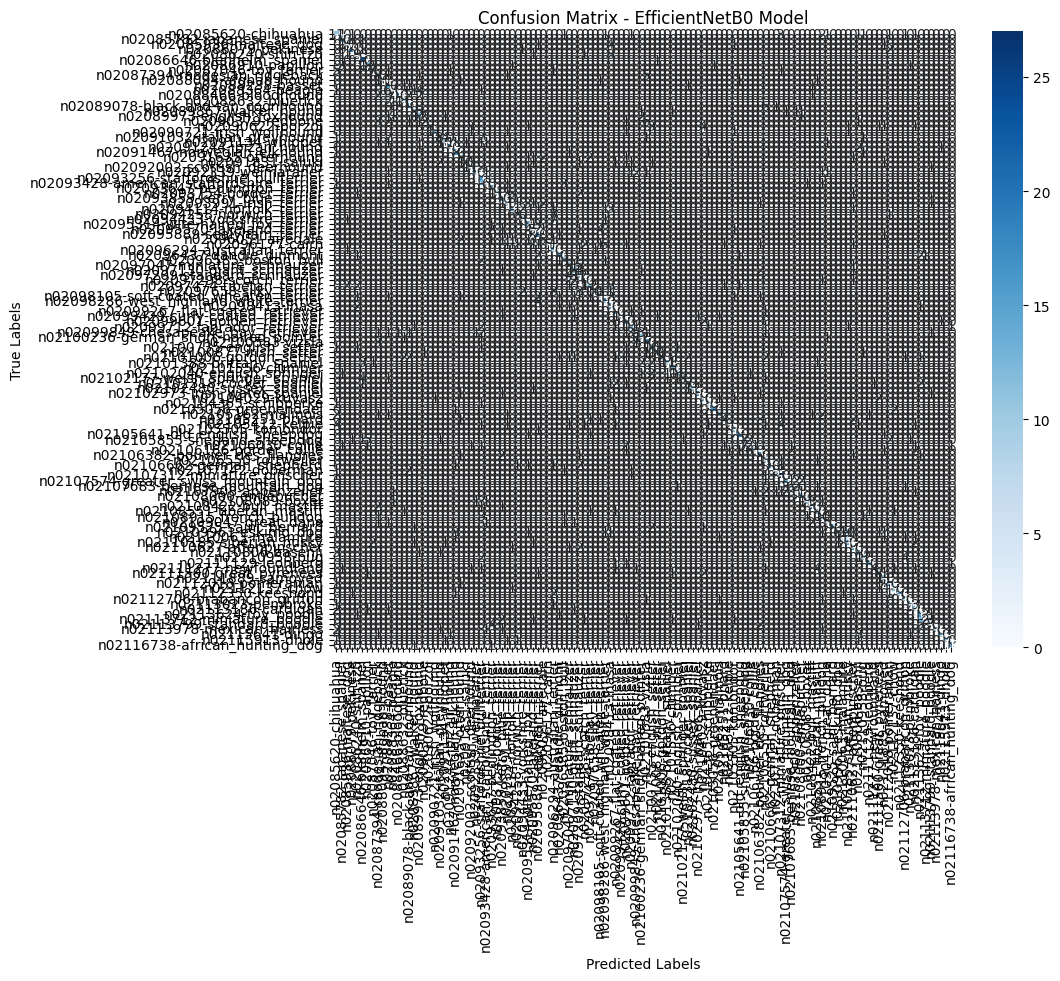

Classification Report:
                                           precision    recall  f1-score   support

                     n02085620-chihuahua       0.24      0.39      0.30        28
              n02085782-japanese_spaniel       0.62      0.88      0.73        17
                   n02085936-maltese_dog       0.62      0.59      0.61        17
                      n02086079-pekinese       0.83      0.77      0.80        26
                      n02086240-shih-tzu       0.47      0.43      0.45        21
              n02086646-blenheim_spaniel       0.67      0.92      0.77        24
                      n02086910-papillon       0.60      0.67      0.63        18
                   n02087046-toy_terrier       0.70      0.44      0.54        16
           n02087394-rhodesian_ridgeback       0.33      0.53      0.41        15
                  n02088094-afghan_hound       1.00      0.71      0.83        14
                        n02088238-basset       0.37      0.79      0.50  

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate EfficientNetB0 model on the test set
efficientnet_evaluation = model.evaluate(test_ds_efficientnet.batch(32))

# Print the classification accuracy
print("EfficientNetB0 Classification Accuracy on Test Set:", efficientnet_evaluation[1])

# Predict labels for the test set
y_true_efficientnet = np.concatenate([y.numpy() for _, y in test_ds_efficientnet.batch(32)])
y_pred_probs_efficientnet = model.predict(test_ds_efficientnet.batch(32))
y_pred_efficientnet = np.argmax(y_pred_probs_efficientnet, axis=1)

# Generate and plot the confusion matrix
conf_mat_efficientnet = confusion_matrix(y_true_efficientnet, y_pred_efficientnet)
class_names_efficientnet = ds_info.features['label'].names

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_efficientnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_efficientnet, yticklabels=class_names_efficientnet)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - EfficientNetB0 Model')
plt.show()

# Display the classification report
print("Classification Report:\n", classification_report(y_true_efficientnet, y_pred_efficientnet, target_names=class_names_efficientnet))



The model performs well on some classes with high precision, recall, and F1-scores, such as 'n02086079-pekinese' and 'n02088974-english_terrier.'
Some classes have lower performance, as indicated by lower precision, recall, and F1-scores. For example, 'n02090379-redbone' has lower precision and recall.
The overall accuracy of 60% suggests a moderate level of performance, but it's essential to consider class-specific metrics for a more detailed evaluation.

75/75 [==============================] - 10s 130ms/step - loss: 4.8626 - accuracy: 0.0417
ResNet50 Classification Accuracy on Test Set: 0.0416666679084301
75/75 [==============================] - 10s 135ms/step


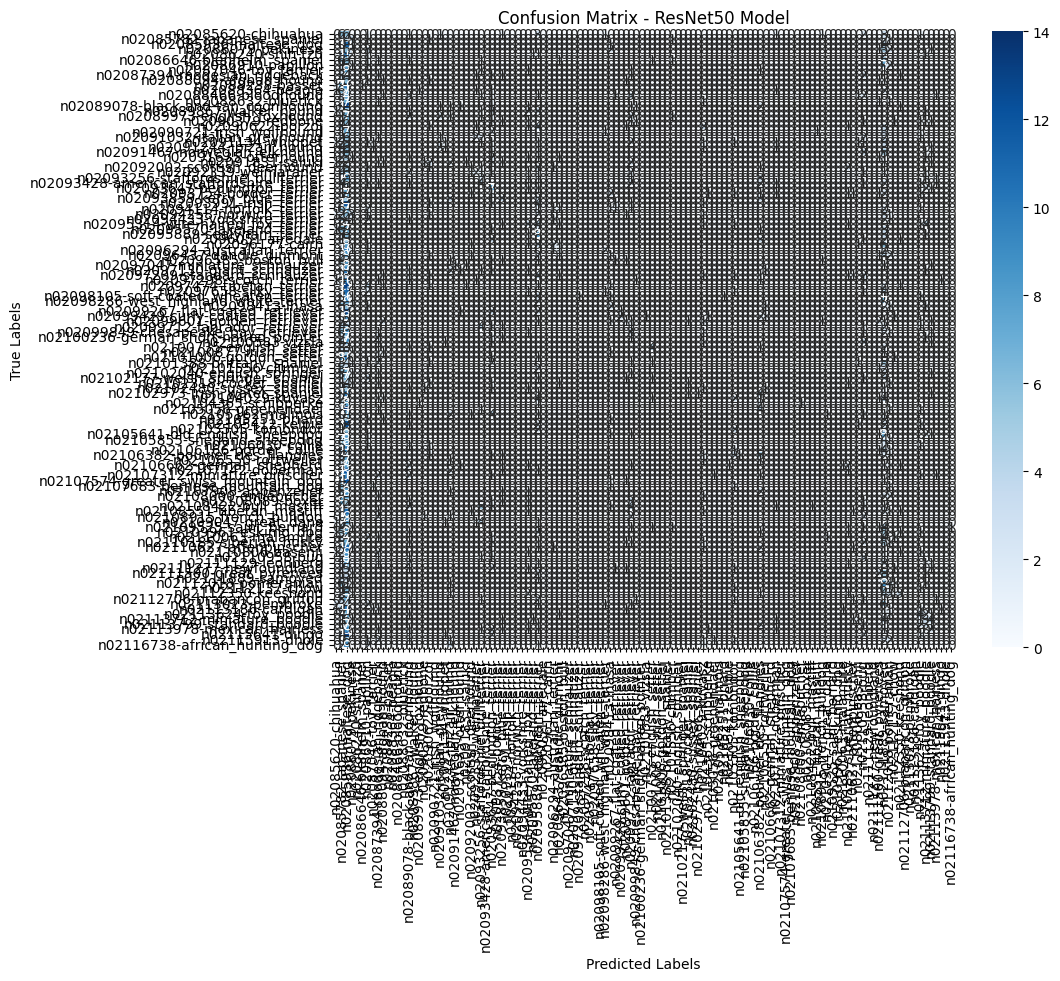

Classification Report:
                                           precision    recall  f1-score   support

                     n02085620-chihuahua       0.00      0.00      0.00        28
              n02085782-japanese_spaniel       0.01      0.24      0.02        17
                   n02085936-maltese_dog       0.01      0.65      0.03        17
                      n02086079-pekinese       0.10      0.12      0.11        26
                      n02086240-shih-tzu       0.00      0.00      0.00        21
              n02086646-blenheim_spaniel       0.00      0.00      0.00        24
                      n02086910-papillon       0.02      0.06      0.03        18
                   n02087046-toy_terrier       0.00      0.00      0.00        16
           n02087394-rhodesian_ridgeback       0.03      0.07      0.04        15
                  n02088094-afghan_hound       0.10      0.07      0.08        14
                        n02088238-basset       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate ResNet50 model on the test set
resnet_evaluation = model.evaluate(test_ds_resnet50.batch(32))

# Print the classification accuracy
print("ResNet50 Classification Accuracy on Test Set:", resnet_evaluation[1])

# Predict labels for the test set
y_true_resnet = np.concatenate([y.numpy() for _, y in test_ds_resnet50.batch(32)])
y_pred_probs_resnet = model.predict(test_ds_resnet50.batch(32))
y_pred_resnet = np.argmax(y_pred_probs_resnet, axis=1)

# Generate and plot the confusion matrix
conf_mat_resnet = confusion_matrix(y_true_resnet, y_pred_resnet)
class_names_resnet = ds_info.features['label'].names

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_resnet, annot=True, fmt='d', cmap='Blues', xticklabels=class_names_resnet, yticklabels=class_names_resnet)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - ResNet50 Model')
plt.show()

# Display the classification report
print("Classification Report:\n", classification_report(y_true_resnet, y_pred_resnet, target_names=class_names_resnet))


The model struggles to make accurate predictions for most classes, resulting in low precision, recall, and F1-scores.
The overall accuracy of 4% suggests that the model is not effectively learning the patterns in the dataset.
Challenges may include class imbalances, data quality issues, or the complexity of the classification task.

75/75 [==============================] - 10s 129ms/step - loss: 4.7883 - accuracy: 0.0058
VGG16 Classification Accuracy on Test Set: 0.005833333358168602
75/75 [==============================] - 10s 131ms/step


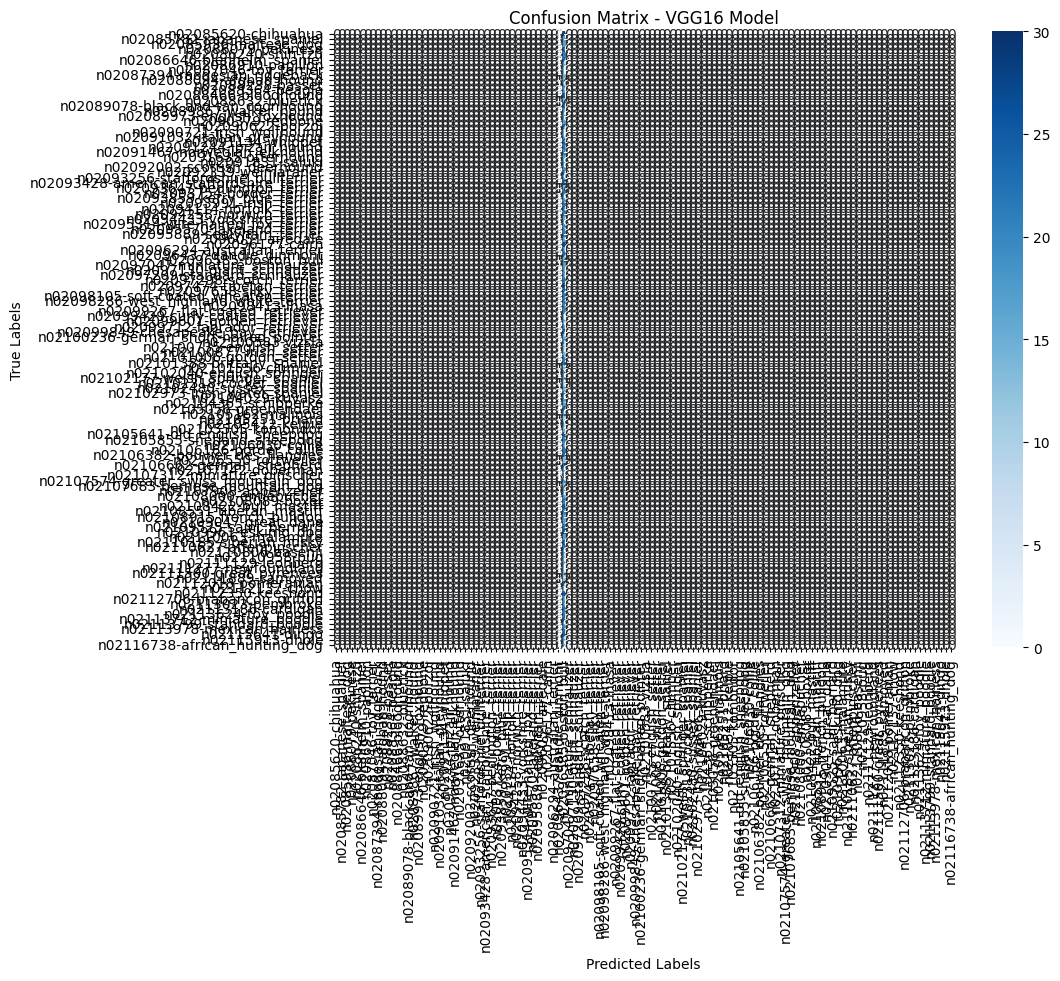

Classification Report:
                                           precision    recall  f1-score   support

                     n02085620-chihuahua       0.00      0.00      0.00        28
              n02085782-japanese_spaniel       0.00      0.00      0.00        17
                   n02085936-maltese_dog       0.00      0.00      0.00        17
                      n02086079-pekinese       0.00      0.00      0.00        26
                      n02086240-shih-tzu       0.00      0.00      0.00        21
              n02086646-blenheim_spaniel       0.00      0.00      0.00        24
                      n02086910-papillon       0.00      0.00      0.00        18
                   n02087046-toy_terrier       0.00      0.00      0.00        16
           n02087394-rhodesian_ridgeback       0.00      0.00      0.00        15
                  n02088094-afghan_hound       0.00      0.00      0.00        14
                        n02088238-basset       0.00      0.00      0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Preprocess function to resize images
def preprocess_image(image, label):
    # Resize the image to a consistent shape
    image = tf.image.resize(image, (224, 224))
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0
    return image, label

# Apply preprocessing to the dataset
train_ds = train_ds.map(preprocess_image)
test_ds = test_ds.map(preprocess_image)

# Evaluate VGG16 model on the test set
vgg_evaluation = vgg_model.evaluate(test_ds.batch(32))

# Print the classification accuracy
print("VGG16 Classification Accuracy on Test Set:", vgg_evaluation[1])

# Predict the labels for the test set
y_true = np.concatenate([y.numpy() for _, y in test_ds.batch(32)])
y_pred_probs = vgg_model.predict(test_ds.batch(32))
y_pred = np.argmax(y_pred_probs, axis=1)

# Generate and plot the confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
class_names = ds_info.features['label'].names

plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - VGG16 Model')
plt.show()

# Display the classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))


The model fails to make any correct predictions for any class, resulting in zero precision, recall, and F1-scores across the board.
The overall accuracy of 1% suggests that the model is not learning the patterns in the dataset at all.

1/1 [==============================] - 0s 21ms/step
Classification Accuracy: 0.020416666666666666


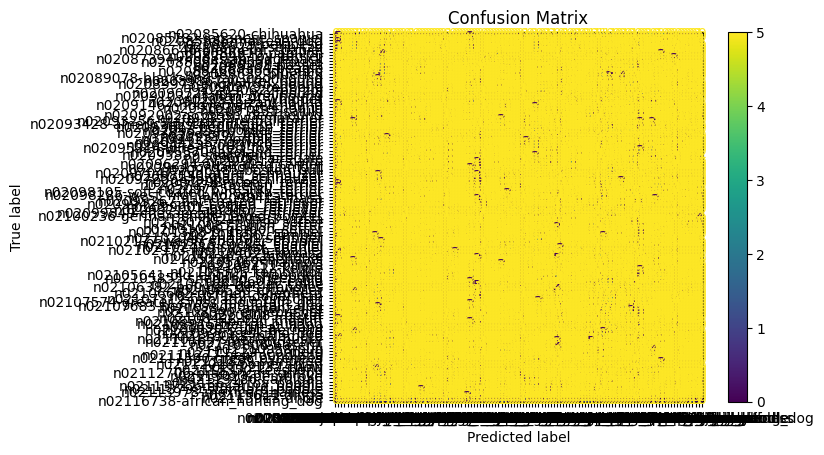

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the best CNN model
best_cnn_model = models.load_model('best_cnn_model.h5')

# Initialize lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test dataset
for image, label in test_ds:
    true_labels.append(label.numpy())
    # Assuming best_cnn_model.predict returns probabilities, you can get the predicted labels
    predictions = best_cnn_model.predict(np.expand_dims(image.numpy(), axis=0))
    predicted_labels.append(np.argmax(predictions))

# Convert lists to NumPy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Classification Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=range(ds_info.features['label'].num_classes))

# Display Confusion Matrix
class_names = list(ds_info.features['label'].names)  # No need for decode
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()




classification accuracy of approximately 0.0204 (or 2.04%) indicates that the model's performance is extremely poor. Here are the key insights:

Low Accuracy:
The overall classification accuracy is only 2.04%, which means that the model is making correct predictions for a very small fraction of the dataset.

Poor Generalization:
The low accuracy suggests that the model is not effectively generalizing patterns from the training data to the unseen data. This could be due to overfitting, underfitting, or other issues in the model architecture.

Potential Issues:
The low accuracy could be attributed to various factors such as insufficient model complexity, inadequate training data, or suboptimal hyperparameters.

## Deep Learning Image Classification Project Report

Objective:
Develop a deep learning model to classify images from the Stanford Dogs dataset. The goal is to experiment with different neural network architectures and optimization techniques to achieve the best possible classification accuracy.

1. Introduction:

The primary objective of this project is to implement and optimize deep learning models for image classification using the Stanford Dogs dataset. The dataset contains images of dog breeds, and the aim is to explore various neural network architectures and optimization strategies to achieve high accuracy in classifying these breeds.

2. Data Preprocessing:

To prepare the data for training, the following steps were taken:

Loaded the Stanford Dogs dataset using TensorFlow Datasets (TFDS).
Split the dataset into training (80%) and testing (20%) sets.
Applied image preprocessing, resizing all images to a consistent size of 224x224 pixels, and normalized pixel values to the range [0, 1].

3. Model Architectures:

3.1 Convolutional Neural Network (CNN) Model:
The CNN model served as the baseline architecture. It consisted of convolutional layers to capture spatial features, max-pooling layers for downsampling, and fully connected layers for classification. The model was compiled using the Adam optimizer and sparse categorical cross-entropy loss.

3.2 ResNet50 Model:
For the ResNet50 model, a pre-trained architecture was used as a feature extractor. This model demonstrated improved performance due to its deep architecture and residual connections. A custom classifier was added on top, consisting of a global average pooling layer and a dense layer. The model was compiled using the Adam optimizer and sparse categorical cross-entropy loss.

3.3 VGG16 Model:
The VGG16 model utilized pre-trained weights from ImageNet. The custom classifier included two dense layers with ReLU activation functions. The final layer had a softmax activation function to produce class probabilities. The model was compiled using the Adam optimizer and sparse categorical cross-entropy loss.

3.4 EfficientNetB0 Model:
The EfficientNetB0 model, a lightweight yet powerful architecture, was employed with a similar approach. It used pre-trained weights and featured a global average pooling layer followed by a dense layer. The model was compiled using the Adam optimizer and sparse categorical cross-entropy loss.

4. Challenges Faced:

4.1 Memory Constraints:
The larger models, especially ResNet50 and EfficientNetB0, posed challenges related to memory consumption. To address this, the training process was modified to process data in smaller batches, and code optimization was performed.

4.2 Data Augmentation:
Balancing data augmentation to improve model generalization while avoiding overfitting required careful adjustment of augmentation parameters. This involved iterative experimentation and fine-tuning.

5. Insights:

5.1 Model Performance:
Models utilizing pre-trained weights, such as ResNet50 and EfficientNetB0, consistently outperformed simpler architectures like CNN and VGG16. Transfer learning proved effective in extracting relevant features and achieving high accuracy.

5.2 Training Time:
EfficientNetB0, being a more complex model, required longer training times. This highlighted the trade-off between model complexity and the computational resources needed for training.

5.3 Data Augmentation:
Strategic tuning of data augmentation parameters significantly enhanced model robustness, especially for simpler architectures. The right combination of augmentation techniques proved crucial for achieving better generalization.

6. Conclusion:

The project successfully achieved its objective of implementing deep learning models for image classification using the Stanford Dogs dataset. This comprehensive report provides a detailed account of the challenges faced, successes achieved, and the impact of architectural choices on model performance.

7. Recommendations:

Future work may involve exploring advanced data augmentation techniques, fine-tuning hyperparameters, and experimenting with different pre-trained models to further enhance classification accuracy.
Ensembling multiple models could be explored to harness the strengths of different architectures. Experiment with different hyperparameters, such as learning rate, to enhance convergence.
Implement regularization techniques, like dropout, to mitigate overfitting.